In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette(palette='husl', color_codes=True)


### TABLE OF CONTENTS
<ul>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
<li><a href="#AV">Analyzing and Visualizing</a></li>
<li><a href="#Storing">Storing</a></li>
<li><a href="#Resources">Resources</a></li>
</ul>

<a id='Gathering'></a>
## Gathering

1. Downloaded manually (CSV-file)
2. Download programmatically using requests (TSV-file), link:
   https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. JSON

#### 1. Open CSV File with Pandas 

In [2]:
# Open twitter archive csv and read into a dataframe
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Download file (TSV) programmatically using Requests API

In [3]:
# Download programmatically using requests (TSV-file), link:
# https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(URL)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

# Read TSV file

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Open JSON file downloaded directly

In [4]:
# opening json file and loading into a dataframe
json_columns_list = []

with open('tweet-json.txt') as file:
    for tweet in file:
        item = json.loads(tweet)
        tweet_id = item['id']
        followers = item['user']['followers_count']
        friends = item['user']['friends_count']
        favourited = item['favorite_count']
        retweets = item['retweet_count']
        retweeted = item['retweeted']
    
        json_columns_list.append({'tweet_id' : str(tweet_id),
                              'followers' : int(followers),
                              'friends' : int(friends),
                              'favourited' : int(favourited),
                              'retweets' : int(retweets),
                              'retweeted' : bool(retweeted),
                                 })
        tweet_json = pd.DataFrame(json_columns_list, columns=['tweet_id', 'followers','friends', 
                                                                  'favourited','retweets', 'retweeted'])


In [5]:
tweet_json.head()

,tweet_id,followers,friends,favourited,retweets,retweeted
0,892420643555336193,3200889,104,39467,8853,False
1,892177421306343426,3200889,104,33819,6514,False
2,891815181378084864,3200889,104,25461,4328,False
3,891689557279858688,3200889,104,42908,8964,False
4,891327558926688256,3200889,104,41048,9774,False


**Gathering Comment:**

All three data sources have been gathered and stored in respective pandas dataframes. I didn't use twitter API since I couldn't get my twitter account to work and I haven't gotten feedback from their support team. Therefore, I used the finished JSON file provided and used the code above to open the file with the mindset/imagination that I have been extracting data that was downloaded from the API

<a id='Assessing'></a>
## Assessing
Assess the three frames visually and programmatically for quality and tidiness issues. 
Detect and document at least eight (8) quality issues and two (2) tidiness issues.
These are some principles I am setting out to clean the datasets:

- Only keep original ratings (no retweets) that have images, not all are dog ratings and some are retweets.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### 1. Twitter Arch - Visual and Programmatic Assessment

In [6]:
# Getting an overview of the dataset
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# looking over the dataset info, using the info() method.
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# Checking the amount of retweets, same number as the non-nulls in the previous box
twitter_arch.retweeted_status_id.count()

181

In [9]:
# Searching for duplicates in the tweet_id column
twitter_arch.tweet_id.duplicated().sum()

0

In [10]:
# Looking for value_counts in the name column
twitter_arch.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Jeffrie      1
Laela        1
Emmie        1
Tripp        1
Karll        1
Name: name, Length: 957, dtype: int64

In [11]:
# Using value_counts to get an overview of the ratings_numerator column
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# Using value_counts to get an overview of the ratings_denominator column
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### 2. Image Prediction - Visual and Programmatic Assessment

In [13]:
# Getting an overview of the dataframe
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
# Using the info method to get info regarding the columns, no nulls and datatype etc.
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# Checking whether all picures contain dogs
image_prediction.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [16]:
# Inspecting how many rows have p1_dog, p2_dog and p3_dog all as 'False'
image_prediction.query('p1_dog == False and p2_dog == False and p3_dog == False').shape

(324, 12)

In [17]:
# Looking for duplicates in the jpg_url column
image_dup = image_prediction[image_prediction.jpg_url.duplicated(keep=False)]
image_dup.sort_values("jpg_url", axis=0)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


### Tweet Json - Visual and Programmatic Assessment

In [18]:
# Getting an overview of the DataFrame
tweet_json

,tweet_id,followers,friends,favourited,retweets,retweeted
0,892420643555336193,3200889,104,39467,8853,False
1,892177421306343426,3200889,104,33819,6514,False
2,891815181378084864,3200889,104,25461,4328,False
3,891689557279858688,3200889,104,42908,8964,False
4,891327558926688256,3200889,104,41048,9774,False
...,...,...,...,...,...,...
2349,666049248165822465,3201018,104,111,41,False
2350,666044226329800704,3201018,104,311,147,False
2351,666033412701032449,3201018,104,128,47,False
2352,666029285002620928,3201018,104,132,48,False


In [19]:
# Getting info about columns, rows and Dtype
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2354 non-null   object
 1   followers   2354 non-null   int64 
 2   friends     2354 non-null   int64 
 3   favourited  2354 non-null   int64 
 4   retweets    2354 non-null   int64 
 5   retweeted   2354 non-null   bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 94.4+ KB


In [20]:
# Looking after duplicates
tweet_json_dup = tweet_json[tweet_json.duplicated(keep=False)]
tweet_json_dup

,tweet_id,followers,friends,favourited,retweets,retweeted


In [21]:
# Investigating if there are any retweets in the dataset
tweet_json.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

### Summary from Assessment:

**Quality**

__*twitter_arch:*__
- Twitter archive has 2356 rows
- several columns can be dropped e.g. 'in_reply_to_status_id', 'in_reply_to_user_id', and after rewteeted rows have been dropped, all the retweeted columns can be dropped.
- 181 retweets, will be dropped
- after looking in 'names' I could see that some dogs don't have names where it says 'None' or a single letter like 'a' or 'not', 'one', and 'his'. This isn't detrimental, however if comparing popular names and voting for example, these columns are better of by uniformly being null and not included in the comparison.
- not all ratings are above 10, some are below. Those will be left as they are. Also, some ratings that have a numerator over 20 or above, some that need to be fixed, and others that will be left untouched as they are a summation of of the amount of dogs, e.g. 55/50 which is basically five dogs with a 11/10 rating. Therefore, I will create a new rating column where the sum of the numerator divided by the denominator as a single float format. 
- Source column will not be utilised and therefore dropped.
- Timestamp is data type object, instead of timestamp. Are there tweets after 1st of Aug 2017, if not they will be deleted.

__*image_prediction:*__
- Image prediction has 2075 rows
- 132 tweets are duplicates, duplicates will be removed.
- 324 rows have all columns p1_dog, p2_dog, and p3_dog as 'False'. Due to the tediousness of checking manually whether there is a dog or not in the picture, I will drop the rows to not mix the non-dog data with the dog data. Knowing that there might be a chance that I may delete a few tweets that contain dogs in them.
- Values in p1, p2, and p3 columns have underscores instead of spaces.


__*tweet_json:*__
- tweet_json has 2354 rows
- more rows than that of twitter archive and image prediction
- no duplicates it seems on id, checking for duplicates on followers and friends doesn't seem reasonable.
- followers and friends might not be necessary columns for our analysis
- all tweets in the dataframe are original tweets, column is not needed for further analysis.

**Tidiness**
- Merge all the dataframes into one 'master' dataframe
- doggo, floofer, pupper and puppo should be values in a single column in the twitter_arch dataframe.
- Highest confidence interval column between p1, p2, and p3 will remain as a single column that will represent the dog breed.


<a id='Cleaning'></a>
## Cleaning
Cleaning of all the issues documented.

### Cleaning twitter_arch

In [22]:
twitter_arch_clean = twitter_arch
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


_**Define:**_
- Change twitter_id into a string.

_**Code:**_

In [23]:
# 1. change id into string from int format
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)

_**Test**_

In [24]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

_**Define:**_
- dropping all the retweet rows

_**Code:**_

In [25]:
# 2. order of cleaning, dropping retweets and then the retweets columns
# Querying the rows that does not contain retweets and assigning it as the new dataframe
twitter_arch_clean = twitter_arch.query('retweeted_status_id != retweeted_status_id')

_**Test:**_

In [26]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

_**Define:**_
- Turning 'none' and other non-names into nulls

_**Code:**_

In [27]:
# 3. Turning none names and other non-names into null
# Replacing the string 'None' by NaNs
twitter_arch_clean.name.replace('None', np.nan, inplace=True)
# 
names_incolumn = twitter_arch_clean.name.tolist()
names_incolumn = list(dict.fromkeys(names_incolumn))
names_incolumn.remove(np.nan)
no_name_list = []
for i in names_incolumn:
    if i.islower():
        no_name_list.append(i)
no_name_list
twitter_arch_clean.name.replace(no_name_list, np.nan, inplace=True)

/Users/gustafpetersen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


_**Test:**_

In [28]:
# Doing a similar operation to turn the names column into a list for easier viewability
check_names_incolumn = twitter_arch_clean.name.tolist()
check_names_incolumn = list(dict.fromkeys(check_names_incolumn))
check_names_incolumn
# It looks rather good.

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Walter',
 'Cooper',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Quinn',
 'Zooey',
 'Dave',
 'Jersey',
 'Hobbes',
 

_**Define:**_
- Fix the ratings, denominator that is too high, low or generally looks like an outlier.

_**Code:**_

In [29]:
# 4. Ratings, anything with a denominator above 10 or a rating below 10 needs to be checked and dealt with

# Querying the tweets with a denominator above the numerator when the numerator is above 10
# And making the text into a list for viewability
high_den = twitter_arch_clean.query('rating_denominator > rating_numerator and rating_numerator > 10')
text_list = high_den.text.tolist()
text_list
#leave this alone, will be able to use.

['@docmisterio account started on 11/15/15',
 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK']

In [30]:
# Querying the tweets in the text list above,
# and comparing the ratings in the text to the actual numerator and denominator.
twitter_arch_clean.query('rating_denominator > rating_numerator and rating_numerator > 10')
#    ACTIONS:
# remove row 342

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,NaN,None,None,None,None


In [31]:
# Querying where the denominator rating is below 10,
# and turning it into a list from the text column
low_den = twitter_arch_clean.query('rating_denominator < 10')
text_list_low_den = low_den.text.tolist()
text_list_low_den

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [32]:
# Querying the tweets in the text list above and comparing the ratings in the text to the actual numerator and denominator.
twitter_arch_clean.query('rating_denominator < 10')
#     ACTONS:
# Will change 960/10 into 13/10
# Will remove index 516
# Will change 1/2 into 9/10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,NaN,None,None,None,None


In [33]:
# Finding the numerator outliers where the rating is above 20,
# and turning the text column into a list to be able to see the tweet.
high_num = twitter_arch_clean.query('rating_numerator >= 20')
text_list_high = high_num.text.tolist()
text_list_high

['@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
 '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
 '@markhoppus 182/10',
 "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Why does this never happen at my front door... 165/150 https://t.c

In [34]:
# Querying the tweets in the text list above and comparing the ratings in the text to the actual numerator and denominator.
twitter_arch_clean.query('rating_numerator >= 20')
#     ACTIONS:
# Remove row 188,189,290
# Change 960/0 into 13/10
# dropping row 516 in an earlier operation
# Row 695 is supposed to have the rating 9.75 / 10
# row 979 will be dropped
# drop row 1663
# row 1712, change into 11/10
# drop 2074 Snoop Dogg is not a dog, but I see what you did there.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,NaN,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,NaN,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [35]:
#Summary of actions and executed:
# Dropping eight tweets

# Remove rows 342, 188, 189, 290, 516, 979, 1663, and 2074 Snoop Dogg is not a dog, but I see what you did there, 
# ids: 832088576586297345, 855862651834028034, 855860136149123072, 838150277551247360, 810984652412424192, 
# 749981277374128128, 682808988178739200, 670842764863651840

twitter_arch_clean = twitter_arch_clean.query('tweet_id != "832088576586297345" and tweet_id != "855862651834028034" and tweet_id != "855860136149123072" and tweet_id != "838150277551247360" and tweet_id != "810984652412424192" and tweet_id != "749981277374128128" and tweet_id != "682808988178739200" and tweet_id != "670842764863651840" and tweet_id != "838085839343206401"')

# Changing values of four tweets
twitter_arch_clean.loc[twitter_arch_clean.tweet_id == '835246439529840640', 'rating_numerator'] = 13 # Change row 313 - 960/10 into 13/10
twitter_arch_clean.loc[twitter_arch_clean.tweet_id == '835246439529840640', 'rating_denominator'] = 10
twitter_arch_clean.loc[twitter_arch_clean.tweet_id == '666287406224695296', 'rating_numerator'] = 9 # Change row 2335 - 1/2 into 9/10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '666287406224695296'), 'rating_denominator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '786709082849828864'), 'rating_numerator'] = 9.75 # Change row 695 into 9.75/10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '786709082849828864'), 'rating_denominator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '680494726643068929'), 'rating_numerator'] = 11 # Change row 1712, change into 11/10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '680494726643068929'), 'rating_denominator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '778027034220126208'), 'rating_numerator'] = 11 # Change row 763 into 11/10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '778027034220126208'), 'rating_denominator'] = 10 
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '881633300179243008'), 'rating_numerator'] = 11 # Change row into 13/10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == '881633300179243008'), 'rating_denominator'] = 10 



_**Test:**_

In [36]:
twitter_arch_clean.query('tweet_id == "832088576586297345" or tweet_id == "855862651834028034" or tweet_id == "855860136149123072" or tweet_id == "838150277551247360" or tweet_id == "810984652412424192" or tweet_id == "749981277374128128" or tweet_id == "682808988178739200" or tweet_id == "670842764863651840"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
# Inspecting changes
twitter_arch_clean.query('rating_numerator >= 20')
# All of these are numerator divisible by corresåonding denominators, thus able to create a new rating column.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70,NaN,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150,NaN,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90,NaN,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80.0,80,NaN,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50,NaN,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60.0,50,NaN,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44.0,40,NaN,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143.0,130,NaN,None,None,None,None


_**Define:**_
- The ratings has gotten rid of a few outliers, now i will create a new column standardising the rating by dividing the numerator by its denominator.

_**Code:**_

In [38]:
# Creating a new rating column named 'rating' that takes the rating_numerator divided by rating_denominator
twitter_arch_clean['rating'] = twitter_arch_clean.rating_numerator / twitter_arch_clean.rating_denominator
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,1.2


_**Test:**_

In [39]:
twitter_arch_clean.rating.value_counts()
# checking the ratings and nothing is above 1.4 which is good.

1.200000    504
1.000000    444
1.100000    434
1.300000    308
0.900000    157
0.800000     98
0.700000     53
1.400000     43
0.500000     36
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      7
0.000000      2
0.975000      1
0.818182      1
0.636364      1
Name: rating, dtype: int64

_**Define:**_
- Source column is not needed. will be dropped.

_**Code:**_

In [40]:
# 5. Dropping source column
twitter_arch_clean.drop(columns='source', inplace=True)

_**Test:**_

In [41]:
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,1.2


_**Define:**_
- Change the timestamp from object into timestamp.

_**Code:**_

In [42]:
# 6. Timestamp will be changed from object into timestamp format.
twitter_arch_clean.timestamp = pd.to_datetime(twitter_arch.timestamp)


_**Test:**_

In [43]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2166 non-null   object             
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2166 non-null   datetime64[ns, UTC]
 4   text                        2166 non-null   object             
 5   retweeted_status_id         0 non-null      float64            
 6   retweeted_status_user_id    0 non-null      float64            
 7   retweeted_status_timestamp  0 non-null      object             
 8   expanded_urls               2114 non-null   object             
 9   rating_numerator            2166 non-null   float64            
 10  rating_denominator          2166 non-null   int64           

In [44]:
# checking if there are tweets after 1st of Aug 2017?
# It seems like there isn't so we won't bother executing any dropping of rows
twitter_arch_clean.timestamp.sort_values()

2355   2015-11-15 22:32:08+00:00
2354   2015-11-15 23:05:30+00:00
2353   2015-11-15 23:21:54+00:00
2352   2015-11-16 00:04:52+00:00
2351   2015-11-16 00:24:50+00:00
                  ...           
4      2017-07-29 16:00:24+00:00
3      2017-07-30 15:58:51+00:00
2      2017-07-31 00:18:03+00:00
1      2017-08-01 00:17:27+00:00
0      2017-08-01 16:23:56+00:00
Name: timestamp, Length: 2166, dtype: datetime64[ns, UTC]

**_Define:_**
- Change the columns, doggo, pupper, puppo, and floofer into 1 column. Using and if, elif, else function

**_Code:_**

In [45]:
# 7. Turning columns, doggo, floofer, pupper and puppo into a single columns
# and the aforementioned columns are the values inside this new column.
# First replace all 'None' strings into NaN with str.replace method
twitter_arch_clean.doggo.replace('None', np.nan, inplace=True)
twitter_arch_clean.floofer.replace('None', np.nan, inplace=True)
twitter_arch_clean.pupper.replace('None', np.nan, inplace=True)
twitter_arch_clean.puppo.replace('None', np.nan, inplace=True)

# Then create a function that uses if,elif, and else to figure out which value in each column can be found

def dog_development_split(i):
    if i['doggo'] == 'doggo':
        return 'doggo'
    elif i['pupper'] == 'pupper':
        return 'pupper'
    elif i['puppo'] == 'puppo':
        return 'puppo'
    elif i['floofer'] == 'floofer':
        return 'floofer'
    else: 
        pass
# Then use apply() method and lambda to execute the function above
twitter_arch_clean['dog_dev'] = twitter_arch_clean.apply(lambda i: dog_development_split(i), axis=1)
# Drop columns that aren't needed anymore
twitter_arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

**_Test:_**

In [46]:
# Get a look at the dataset once more
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_dev
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,1.3,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,1.3,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,1.2,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,1.3,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,1.2,None


In [47]:
# Inspect each category in the dog_dev column with value_counts method
twitter_arch_clean.dog_dev.value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: dog_dev, dtype: int64

In [48]:
# Info about columns and dataset as a whole
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2166 non-null   object             
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2166 non-null   datetime64[ns, UTC]
 4   text                        2166 non-null   object             
 5   retweeted_status_id         0 non-null      float64            
 6   retweeted_status_user_id    0 non-null      float64            
 7   retweeted_status_timestamp  0 non-null      object             
 8   expanded_urls               2114 non-null   object             
 9   rating_numerator            2166 non-null   float64            
 10  rating_denominator          2166 non-null   int64           

In [49]:
# Inspecting the shape
twitter_arch_clean.shape

(2166, 14)

In [50]:
# Checking for duplicates
twitter_arch_clean.tweet_id.duplicated().sum()

0

**_Define:_**
- Dropping all rows not necessarily needed for analysis

**_Code:_**

In [51]:
# 8. Dropping all the unnessescary columns that won't be used for the analysis
# in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator
twitter_arch_clean = twitter_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator'])

_**Test:**_

In [52]:
twitter_arch_clean.head()

,tweet_id,text,name,rating,dog_dev
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1.3,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,1.3,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,1.2,None


In [53]:
twitter_arch_clean.shape

(2166, 5)

### Cleaning image_prediction

In [54]:
# Get an overview of the dataset
image_prediction_clean = image_prediction
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**_Define:_**
- Dropping duplicated rows.

**_Code:_**

In [55]:
# 1. Remove 132 duplicates
image_prediction_clean.jpg_url.drop_duplicates(keep=False, inplace=True)

**_Test:_**

In [56]:
image_prediction_clean.jpg_url.duplicated().sum()

0

**_Define:_**
- Getting rid of rows that their don't have the prediction as 'True' for any of the columns, meaning that it is probably not a dog in the picture, according to the prediction algorithm.

**_Code:_**

In [57]:
# 2. 324 columns in the dataframe have p1_dog, p2_dog, and p3_dog all as 'False'
# meaning that the algorithm can distinguish that there are dogs in the pictures. 
# Since 324 takes too much time to inspect each and every single url, these will be dropped.
image_prediction_clean = image_prediction_clean.query('p1_dog != False and p2_dog != False and p3_dog != False')

test

In [58]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**_Define:_**
- Change the three rows p1, p1, and p3 into the column that has the highest confidence interval

**_Code:_**

In [59]:
# Turn p1, p2 and p3 where the the confidence interval for each row is the highest to the corresponding breed
def dog_breed_find(i):
    if i['p1_conf'] > (i['p2_conf'] and i['p3_conf']):
        return i['p1']
    elif i['p2_conf'] > (i['p1_conf'] and i['p3_conf']):
        return i['p2']
    elif i['p3_conf'] > (i['p1_conf'] and i['p2_conf']):
        return i['p3']
    else:
        return "Error"

image_prediction_clean['dog_breed'] = image_prediction_clean.apply(lambda i: dog_breed_find(i), axis=1)

/Users/gustafpetersen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


**_Test:_**

In [60]:
image_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
1131,728046963732717569,https://pbs.twimg.com/media/ChqK2cVWMAAE5Zj.jpg,1,Newfoundland,0.255971,True,groenendael,0.175583,True,German_shepherd,0.164135,True,Newfoundland
1612,801538201127157760,https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg,1,Pembroke,0.550506,True,Cardigan,0.306612,True,Shetland_sheepdog,0.054230,True,Pembroke
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True,beagle
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True,golden_retriever
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True,Labrador_retriever
547,677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.313464,True,boxer,0.218503,True,French_bulldog,0.106462,True,beagle
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True,soft-coated_wheaten_terrier
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,Old_English_sheepdog
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True,Samoyed
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True,Staffordshire_bullterrier


**_Define:_**
- replace all text inside dog_breed that has underscores with spaces.

**_Code:_**

In [61]:
# 3. Values inside p1, p2, and p3 columns are strings with underscores instead of blanks, which will be replaced
image_prediction_clean.dog_breed = image_prediction_clean.dog_breed.str.title().str.replace('_', ' ',)


/Users/gustafpetersen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**_Test:_**

In [62]:
image_prediction_clean.dog_breed.sample(10)

1007                            Borzoi
1023                          Shih-Tzu
431                    German Shepherd
550     American Staffordshire Terrier
756                           Pembroke
1201                  Golden Retriever
111                 Norwegian Elkhound
1945                              Chow
75                       Saint Bernard
1890             Flat-Coated Retriever
Name: dog_breed, dtype: object

**_Define:_**
- Changing tweet_id from an int into a string

**_Code:_**

In [63]:
# 4. tweet id will be turned from an int to object/string
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

**_Test:_**

In [64]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1243 non-null   object 
 1   jpg_url    1243 non-null   object 
 2   img_num    1243 non-null   int64  
 3   p1         1243 non-null   object 
 4   p1_conf    1243 non-null   float64
 5   p1_dog     1243 non-null   bool   
 6   p2         1243 non-null   object 
 7   p2_conf    1243 non-null   float64
 8   p2_dog     1243 non-null   bool   
 9   p3         1243 non-null   object 
 10  p3_conf    1243 non-null   float64
 11  p3_dog     1243 non-null   bool   
 12  dog_breed  1243 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 110.5+ KB


**_Define:_**
- Drop all columns not necessary for further analysis, keeping only tweet_id and dog_breed.

**_Code:_**

In [65]:
# Drop unnecessary columns
image_prediction_clean.drop(columns=['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

/Users/gustafpetersen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**_Test:_**

In [66]:
image_prediction_clean.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh Springer Spaniel
1,666029285002620928,Redbone
2,666033412701032449,German Shepherd
3,666044226329800704,Rhodesian Ridgeback
4,666049248165822465,Miniature Pinscher


### Cleaning tweet_json

In [67]:
tweet_json_clean = tweet_json
tweet_json_clean.head()

,tweet_id,followers,friends,favourited,retweets,retweeted
0,892420643555336193,3200889,104,39467,8853,False
1,892177421306343426,3200889,104,33819,6514,False
2,891815181378084864,3200889,104,25461,4328,False
3,891689557279858688,3200889,104,42908,8964,False
4,891327558926688256,3200889,104,41048,9774,False


**_Define:_**
- drop columns not necessary for analysis: followers, friends and retweeted

**_Code:_**

In [68]:
# drop followers and friends columns
tweet_json_clean.drop(columns=['followers', 'friends', 'retweeted'], inplace=True)

**_Test:_**

In [69]:
tweet_json_clean.head()

,tweet_id,favourited,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Merging dataframes

**_Define:_**
- Merging all three dataframes: twitter_arch_clean, image_prediction, and tweet_json into one dataframe --> combined_df

**_Code:_**

In [70]:
# Merge all dataframes on id where that they have a match, complimenting each other in one big dataframe.
# rows where IDs don't match will not be helpful in our analysis thus not kept in our final dataset.
combined_df = twitter_arch_clean.merge(image_prediction_clean, how='left', on='tweet_id')
combined_df = combined_df.merge(tweet_json_clean, how='left', on='tweet_id')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2165
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2166 non-null   object 
 1   text        2166 non-null   object 
 2   name        1389 non-null   object 
 3   rating      2166 non-null   float64
 4   dog_dev     344 non-null    object 
 5   dog_breed   1202 non-null   object 
 6   favourited  2166 non-null   int64  
 7   retweets    2166 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 152.3+ KB


**_Test:_**

In [71]:
combined_df.head()

,tweet_id,text,name,rating,dog_dev,dog_breed,favourited,retweets
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,None,NaN,39467,8853
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,Chihuahua,33819,6514
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,Chihuahua,25461,4328
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,1.3,None,NaN,42908,8964
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,Basset,41048,9774


<a id='AV'></a>
## Analyzing and Visualizing the Data

Analysing the data by visualisation

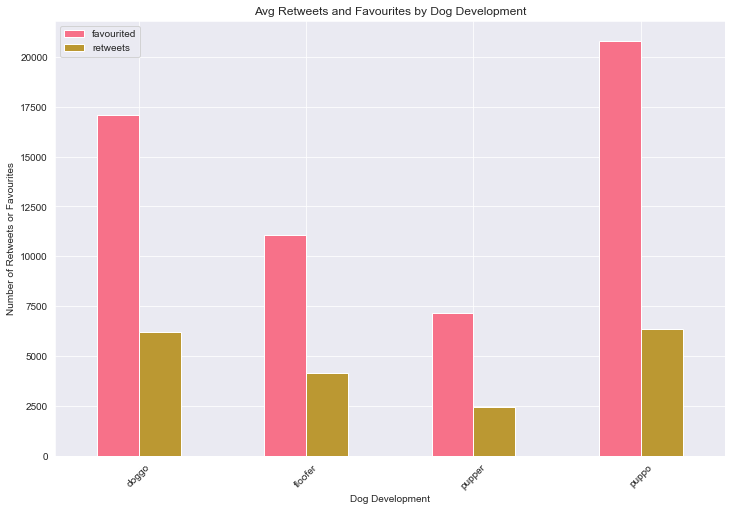

In [72]:
# Most Favourited and Rewteeted Dog Stage/Development
dog_dev = combined_df.query('dog_dev == dog_dev')
dog_dev.groupby('dog_dev')[['favourited', 'retweets']].mean().plot(kind='bar', figsize=(12,8))
plt.bar(dog_dev.dog_dev, dog_dev.rating)
plt.title('Avg Retweets and Favourites by Dog Development')
plt.ylabel('Number of Retweets or Favourites')
plt.xlabel('Dog Development')
plt.xticks(rotation=(45));

In [81]:
dog_dev.groupby('dog_dev')[['favourited', 'retweets']].mean()

,favourited,retweets
dog_dev,,
doggo,17108.804598,6189.655172
floofer,11064.444444,4155.888889
pupper,7176.267857,2457.723214
puppo,20788.875000,6332.500000


According to the number of favourited tweets, puppo is the most popular dog_stage, and by retweets puppo and doggo are almost tied for first place, but puppo has a slightly larger average of retweets.

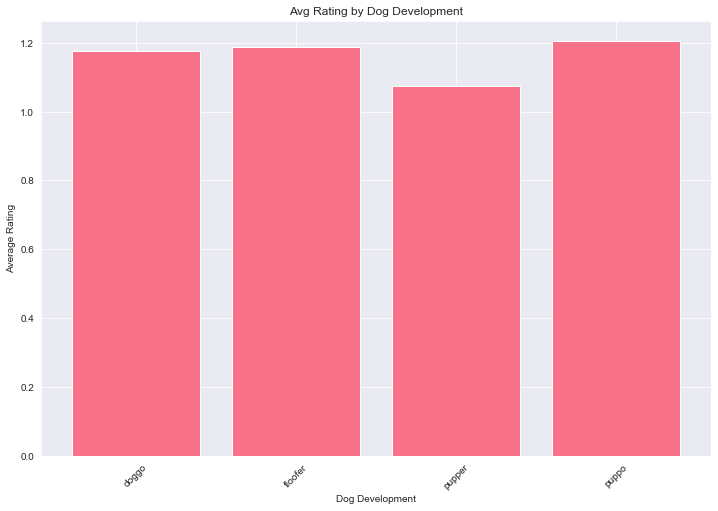

In [73]:
dog_dev_rating = pd.DataFrame(dog_dev.groupby('dog_dev', as_index=False)['rating'].mean())
plt.figure(figsize=(12,8))
plt.bar(dog_dev_rating.dog_dev, dog_dev_rating.rating)
plt.title('Avg Rating by Dog Development')
plt.ylabel('Average Rating')
plt.xlabel('Dog Development')
plt.xticks(rotation=(45));

In [82]:
dog_dev.groupby('dog_dev', as_index=False)['rating'].mean()

,dog_dev,rating
0,doggo,1.177011
1,floofer,1.188889
2,pupper,1.073661
3,puppo,1.204167


The highest rating for the dog_dev is puppo as well.

In [74]:
dog_dev.dog_dev.value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: dog_dev, dtype: int64

In [75]:
dog_breed = combined_df.query('dog_breed == dog_breed')
dog_breed.head()

,tweet_id,text,name,rating,dog_dev,dog_breed,favourited,retweets
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,Chihuahua,33819,6514
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,Chihuahua,25461,4328
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,Basset,41048,9774
7,890729181411237888,When you watch your owner call another dog a g...,NaN,1.3,None,Pomeranian,56848,16716
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Zoey,1.3,None,Irish Terrier,28226,4429


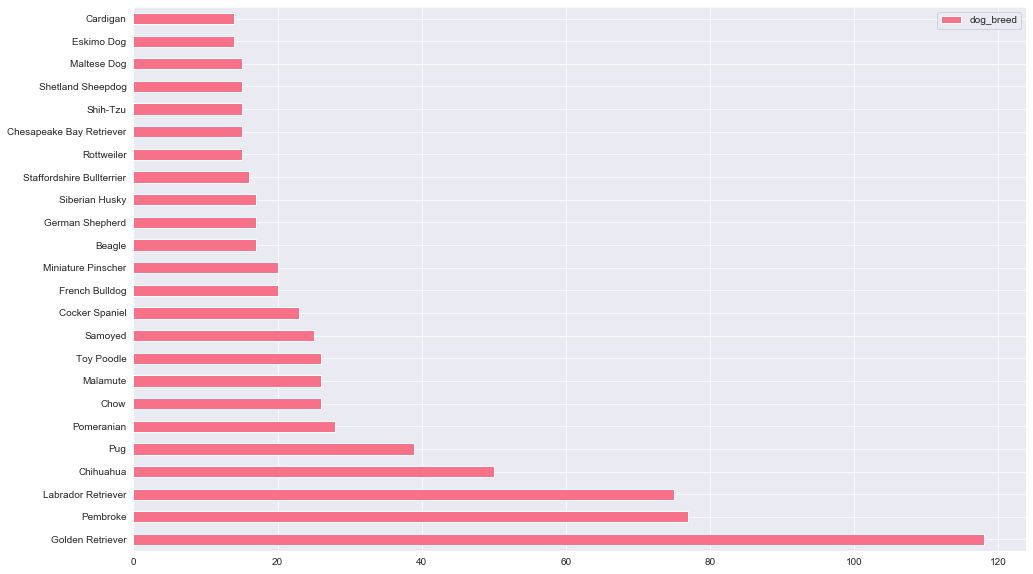

In [76]:
# most tweeted dog breed according to the prediction algorithm
breed_valcount = pd.DataFrame(dog_breed.dog_breed.value_counts().sort_values(ascending=False))
breed_valcount.query('dog_breed > 13').sort_values(by='dog_breed', ascending=False).plot(kind='barh', figsize=(16,10));
# 75% is 12.75 so any breed above the value count of 13

The most common dog according to image prediction is Golden Retriever, followed by Pembroke, and then Labrador Retriever.

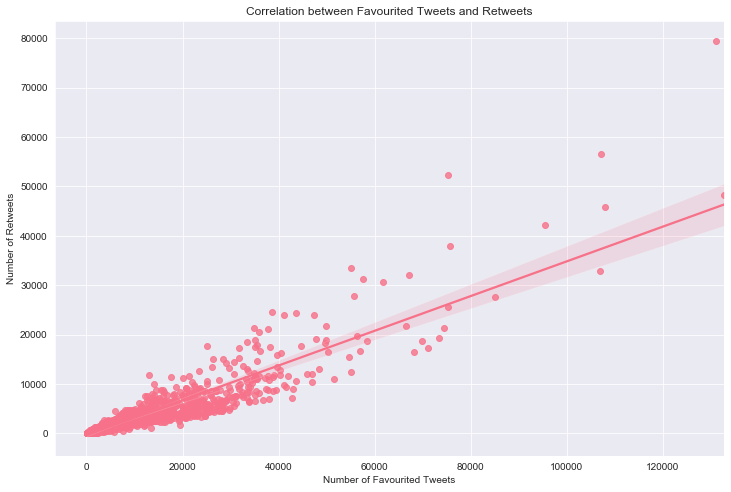

In [77]:
# Plotting the relationship between the amount of retweets and favourited tweets
plt.figure(figsize=(12,8))
sns.regplot(x='favourited', y='retweets', data=combined_df)
plt.title('Correlation between Favourited Tweets and Retweets')
plt.xlabel('Number of Favourited Tweets')
plt.ylabel('Number of Retweets');

There seems to be a correlational relationship between number of retweets and favourites

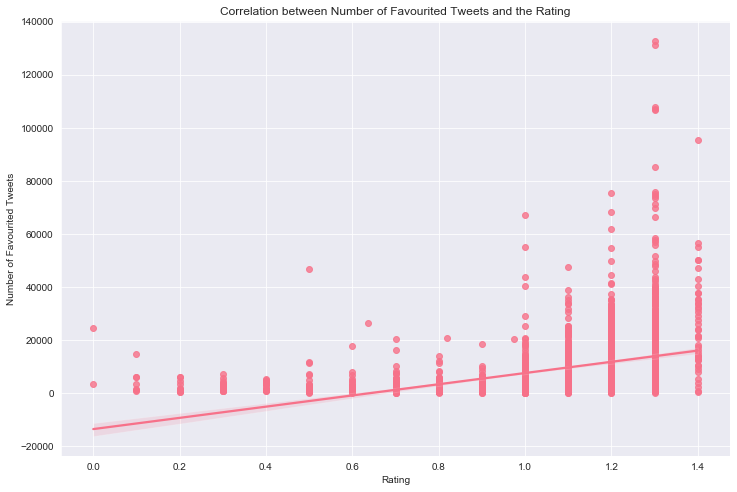

In [78]:
# Plotting the relationship between rating and favourites
plt.figure(figsize=(12,8))
sns.regplot(x='rating', y='favourited', data=combined_df)
plt.title('Correlation between Number of Favourited Tweets and the Rating')
plt.ylabel('Number of Favourited Tweets')
plt.xlabel('Rating');

Also, there seems to be a correlation between the higher the rating, the more Favourited tweets (if only weaker than the previous one comparing retweets and favourites)

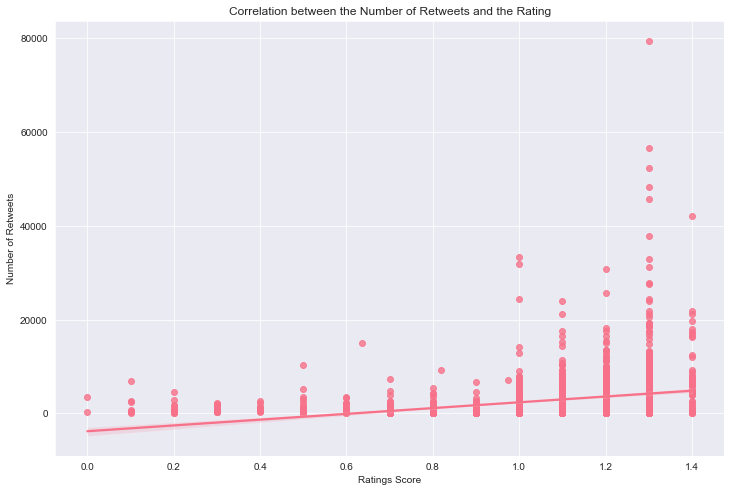

In [79]:
# Plotting the relationship between rating and retweets
plt.figure(figsize=(12,8))
sns.regplot(x='rating', y='retweets', data=combined_df)
plt.title('Correlation between the Number of Retweets and the Rating')
plt.ylabel('Number of Retweets')
plt.xlabel('Ratings Score');

For number of Retweets and Rating it seems like there is a relationship as well, also not as strong as the first graph however,but still as the rating increases, the number of retweets follow suit.

<a id='Storing'></a>
## Storing
Storing file(s) below

In [80]:
#Store the final DataFrame in a CSV file
combined_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

<a id='Resources'></a>
## Resources


List of resources:
- [How to handle JSON files](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)
- [Turning an int into a string](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html)
- [Using .islower() method for evaluating if strings are lowecase](https://www.w3schools.com/python/ref_string_islower.asp#:~:text=The%20islower()%20method%20returns,not%20checked%2C%20only%20alphabet%20characters.)
- [Removing duplicates from list](https://www.w3schools.com/python/python_howto_remove_duplicates.asp)
- [To Datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime)
- [localising values using loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)
- [localinsing values using iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc)
- [Melt function to reorganise column names into row values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt) didn't work for me. So I used a function [Using a function with if/elif/else to write the dog stage into a new column](https://knowledge.udacity.com/questions/80210) instead. Which worked marvelously.
- [Great Stackoverflow post about merging in pandas](https://stackoverflow.com/questions/53645882/pandas-merging-101)
- [Drop duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)
- [Regression plots with Seaborn](https://seaborn.pydata.org/tutorial/regression.html)